In [ ]:
% cd /content/drive/MyDrive/DAUGXray/


# 1.Installation

In [ ]:
!git clone https://github.com/dbolya/yolact.git
% cd yolact

- Install some other packages

In [ ]:
!pip install cython
!pip install opencv-python pillow pycocotools matplotlib 

- If you want to use YOLACT++, compile deformable convolutional layers

In [ ]:
# % cd external/DCNv2
# ! python setup.py build develop

# 2.Prepare data

For more details, see [Tutorial to train a custom dataset](https://github.com/dbolya/yolact#custom-datasets).

- Firstly, Create a COCO-style Object Detection JSON annotation file for your dataset. The specification for this can be found [here](https://cocodataset.org/#format-data)

In [ ]:
import os 
import json

In [ ]:
TRAIN_COCO_JSON = '/content/drive/MyDrive/DAUGXray/DataAug/XRAYBoneDataset/annotations/instances_train.json'
VAL_COCO_JSON = '/content/drive/MyDrive/DAUGXray/DataAug/XRAYBoneDataset/annotations/instances_val.json'
TEST_COCO_JSON = '/content/drive/MyDrive/DAUGXray/DataAug/XRAYBoneDataset/annotations/instances_test.json'

In [ ]:
with open (TRAIN_COCO_JSON, "r") as F:
  data_train = json.load(F)
print(data_train.keys())
print(data_train['annotations'][0])
print(data_train['categories'])
# images
#{'license': 0, 'url': None, 'file_name': 'JPEGImages/forearm_patient09422_study1_negative_image2.jpg',
# 'height': 512, 'width': 420, 'date_captured': None, 'id': 0}

-  Create a definition for your dataset under `dataset_base` in `data/config.py` (see the comments in `dataset_base` for an explanation of each field):


```
my_custom_dataset = dataset_base.copy({
    'name': 'My Dataset',

    'train_images': 'path_to_training_images',
    'train_info':   'path_to_training_annotation',

    'valid_images': 'path_to_validation_images',
    'valid_info':   'path_to_validation_annotation',

    'has_gt': True,
    'class_names': ('my_class_id_1', 'my_class_id_2', 'my_class_id_3', ...)
})
```

- A couple things to note:
   - Class IDs in the annotation file should start at 1 and increase sequentially on the order of `class_names`. If this isn't the case for your annotation file (like in COCO), see the field `label_map` in `dataset_base`.
   - If you do not want to create a validation split, use the same image path and annotations file for validation. By default (see `python train.py --help`), `train.py` will output validation mAP for the first 5000 images in the dataset every 2 epochs.

   
 - Finally, in `yolact_base_config` in the same file, change the value for `'dataset'` to `'my_custom_dataset'` or whatever you named the config object above or you can add some lines of code bellow. 

```
my_yolact_config = yolact_resnet50_config.copy({
    'name': 'my_yolact_config',
    # Dataset stuff
    'dataset': my_custom_dataset,
    'num_classes': len(my_custom_dataset.class_names) + 1,

    # Image Size
    'max_size': 512,
})
```

# 3.Train

- Trains using the base config with a batch size of 8 (the default).
```
python train.py --config=yolact_base_config
```

- Trains yolact_base_config with a batch_size of 5. For the 550px models, 1 batch takes up around 1.5 gigs of VRAM, so specify accordingly.
```
python train.py --config=yolact_base_config --batch_size=5
```
-  Resume training yolact_base with a specific weight file and start from the iteration specified in the weight file's name.
```
python train.py --config=yolact_base_config --resume=weights/yolact_base_10_32100.pth --start_iter=-1
```
- Use the help option to see a description of all available command line arguments
`python train.py --help`

In [ ]:
! python train.py --help

To train, you will need an imagenet-pretrained model:
- Download the pretrained model checkpoint [here](https://drive.google.com/file/d/1Jy3yCdbatgXa5YYIdTCRrSV0S9V5g1rn/v)
- Put the `.pth` file into the yolact/weights folder

In [ ]:
# ! python train.py --config=my_yolact_config --resume=/content/drive/MyDrive/DAUGXray/yolact/weights/my_yolact_config_25_10000.pth --start_iter=-1
# ! python train.py --config=my_yolact_config 
! python train.py --config=my_yolact_config_test 

# 4.Evaluation 

- To evaluate some Yolact models see [This Evaluation Tutorial](https://github.com/dbolya/yolact#evaluation)

In [ ]:
! python eval.py --help

- Bellow is an example
```
python eval.py --trained_model=your_pth_file_after_training.pth--config=my_yolact_config --score_threshold=0.3 --top_k=15 --images= path to dataset/test/JPEGImages/:output_images
```

In [ ]:
# ! python eval.py --trained_model=/content/drive/MyDrive/DAUGXray/yolact/weights/my_yolact_config_25_10000.pth--config=my_yolact_config --score_threshold=0.3 --top_k=15 --images=/content/drive/MyDrive/DAUGXray/DataAug/XRAYBoneDataset/test/JPEGImages/:/content/drive/MyDrive/DAUGXray/DataAug/yolact_output/
! python eval.py --trained_model=/content/drive/MyDrive/DAUGXray/yolact/weights/my_yolact_config_13_5378_interrupt.pth --config=my_yolact_config_test --score_threshold=0.3 --top_k=15 --images=/content/drive/MyDrive/DAUGXray/DataAug/XRAYBoneDataset/test/JPEGImages/:/content/drive/MyDrive/DAUGXray/DataAug/yolact_output_test/


- You can see the output images [here](https://drive.google.com/drive/folders/1k5fuFVp57HAn-9blYygE5c7BcpuqfzFn?usp=sharing).

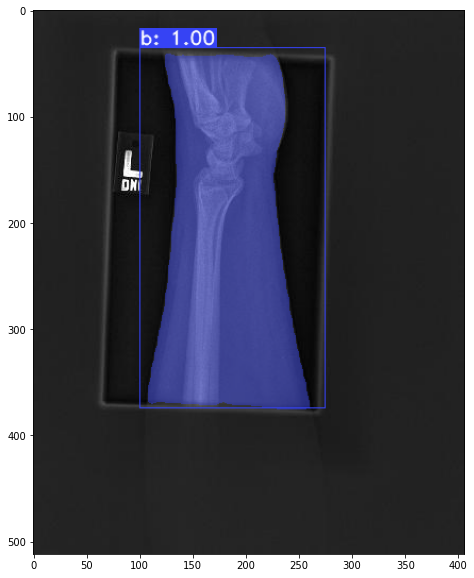

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt

OUTPUT_FOLDER = "/content/drive/MyDrive/DAUGXray/DataAug/yolact_output_test"

show_index = random.randint(0,300)
show_image = cv2.imread(os.path.join(OUTPUT_FOLDER, os.listdir(OUTPUT_FOLDER)[show_index]))
plt.figure(figsize = (10,10))
plt.imshow(show_image)
plt.show()